TODO
1. drop marketing
2. student/ other/ educator = not specified
3. merge scientist & researcher
4. subclustering on frontend & backend & fullstack
5. skills clustering

In [126]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt



In [2]:
encoded_df = pd.read_csv('../data/processed/02_b_encoded.csv',index_col = 0, header = [0,1])


In [3]:
encoded_df

LanguageHaveWorkedWith                                            \
                         APL Assembly Bash/Shell    C    C#  C++ COBOL   
0                        0.0      0.0       19.5  0.0   0.0  0.0   0.0   
1                        0.0      0.0        0.0  0.0   0.0  0.0   0.0   
2                        0.0      0.0        0.0  0.0   0.0  9.0   0.0   
3                        0.0      0.0        0.0  0.0  31.5  0.0   0.0   
4                        0.0      0.0       10.0  0.0   0.0  5.0   0.0   
...                      ...      ...        ...  ...   ...  ...   ...   
56458                    0.0      0.0        0.0  0.0   0.0  0.0   0.0   
56459                    0.0      0.0        0.0  0.0   0.0  0.0   0.0   
56460                    0.0      0.0        0.0  0.0   0.0  0.0   0.0   
56461                    0.0      0.0        9.0  0.0   0.0  0.0   0.0   
56462                    0.0      0.0        0.0  0.0   0.0  0.0   0.0   

                            ...        DevType                             \
      Clojure Crystal Dart  ... Engineer, data Engineer, site reliability   
0         0.0     0.0  0.0  ...              1                          0   
1         0.0     0.0  0.0  ...              0                          0   
2         0.0     0.0  0.0  ...              0                          0   
3         0.0     0.0  0.0  ...              0                          0   
4         5.0     0.0  0.0  ...              0                          0   
...       ...     ...  ...  ...            ...                        ...   
56458     0.0     0.0  0.0  ...              0                          0   
56459    16.5     0.0  0.0  ...              0                          0   
56460     0.0     0.0  0.0  ...              0                          0   
56461     0.0     0.0  0.0  ...              0                          0   
56462     0.0     0.0  0.0  ...              0                          0   

                                                           \
      Engineering manager Marketing or sales professional   
0                       0                               0   
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   
...                   ...                             ...   
56458                   0                               0   
56459                   0                               0   
56460                   0                               0   
56461                   0                               0   
56462                   0                               0   

                                                         \
      Other (please specify): Product manager Scientist   
0                           1               0         0   
1                           0               0         0   
2                           0               0         0   
3                           0               0         0   
4                           0               0         0   
...                       ...             ...       ...   
56458                       0               0         0   
56459                       0               0         0   
56460                       0               0         0   
56461                       0               0         0   
56462                       0               0         0   

                                                                         
      Senior Executive (C-Suite, VP, etc.) Student System administrator  
0                                        0       0                    0  
1                                        0       0                    0  
2                                        0       0                    0  
3                                        0       0                    0  
4                                  

In [4]:
encoded_df2 = encoded_df.copy()

In [5]:
for column in encoded_df.columns:
    encoded_df[column] = np.where(encoded_df[column] > 0 , 1, 0)

In [6]:
encoded_df

LanguageHaveWorkedWith                                              \
                         APL Assembly Bash/Shell  C C# C++ COBOL Clojure   
0                          0        0          1  0  0   0     0       0   
1                          0        0          0  0  0   0     0       0   
2                          0        0          0  0  0   1     0       0   
3                          0        0          0  0  1   0     0       0   
4                          0        0          1  0  0   1     0       1   
...                      ...      ...        ... .. ..  ..   ...     ...   
56458                      0        0          0  0  0   0     0       0   
56459                      0        0          0  0  0   0     0       1   
56460                      0        0          0  0  0   0     0       0   
56461                      0        0          1  0  0   0     0       0   
56462                      0        0          0  0  0   0     0       0   

                    ...        DevType                             \
      Crystal Dart  ... Engineer, data Engineer, site reliability   
0           0    0  ...              1                          0   
1           0    0  ...              0                          0   
2           0    0  ...              0                          0   
3           0    0  ...              0                          0   
4           0    0  ...              0                          0   
...       ...  ...  ...            ...                        ...   
56458       0    0  ...              0                          0   
56459       0    0  ...              0                          0   
56460       0    0  ...              0                          0   
56461       0    0  ...              0                          0   
56462       0    0  ...              0                          0   

                                                           \
      Engineering manager Marketing or sales professional   
0                       0                               0   
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   
...                   ...                             ...   
56458                   0                               0   
56459                   0                               0   
56460                   0                               0   
56461                   0                               0   
56462                   0                               0   

                                                         \
      Other (please specify): Product manager Scientist   
0                           1               0         0   
1                           0               0         0   
2                           0               0         0   
3                           0               0         0   
4                           0               0         0   
...                       ...             ...       ...   
56458                       0               0         0   
56459                       0               0         0   
56460                       0               0         0   
56461                       0               0         0   
56462                       0               0         0   

                                                                         
      Senior Executive (C-Suite, VP, etc.) Student System administrator  
0                                        0       0                    0  
1                                        0       0                    0  
2                                        0       0                    0  
3                                        0       0                    0  
4                                        0       0                    0  
...                                    

### 1. drop marketing


In [7]:
encoded_df.columns.droplevel(level = 0)

Index(['APL', 'Assembly', 'Bash/Shell', 'C', 'C#', 'C++', 'COBOL', 'Clojure',
       'Crystal', 'Dart',
       ...
       'Engineer, data', 'Engineer, site reliability', 'Engineering manager',
       'Marketing or sales professional', 'Other (please specify):',
       'Product manager', 'Scientist', 'Senior Executive (C-Suite, VP, etc.)',
       'Student', 'System administrator'],
      dtype='object', length=150)

In [8]:
encoded_df = encoded_df._drop_axis('Marketing or sales professional', axis=1,level = 1)

### 2. student/ other/ educator = not specified


In [9]:
encoded_df['DevType','Not specified'] = encoded_df.DevType.loc[:,'Student'] + encoded_df.DevType.loc[:,'Other (please specify):'] + encoded_df.DevType.loc[:,'Educator'] 

In [10]:
encoded_df['DevType','Not specified'] = np.where(encoded_df['DevType','Not specified'] > 0 , 1, 0)

In [11]:
encoded_df = encoded_df._drop_axis(['Student','Other (please specify):','Educator'], axis=1,level = 1)

### 3. merge scientist & researcher

In [12]:
encoded_df['DevType','Scientist/Academic researcher'] = encoded_df.DevType.loc[:,'Scientist'] + encoded_df.DevType.loc[:,'Academic researcher']

In [13]:
encoded_df['DevType','Scientist/Academic researcher'] = np.where(encoded_df['DevType','Scientist/Academic researcher'] > 0 , 1, 0)

In [14]:
encoded_df = encoded_df._drop_axis(['Scientist','Academic researcher'], axis=1,level = 1)

In [15]:
encoded_df

LanguageHaveWorkedWith                                              \
                         APL Assembly Bash/Shell  C C# C++ COBOL Clojure   
0                          0        0          1  0  0   0     0       0   
1                          0        0          0  0  0   0     0       0   
2                          0        0          0  0  0   1     0       0   
3                          0        0          0  0  1   0     0       0   
4                          0        0          1  0  0   1     0       1   
...                      ...      ...        ... .. ..  ..   ...     ...   
56458                      0        0          0  0  0   0     0       0   
56459                      0        0          0  0  0   0     0       1   
56460                      0        0          0  0  0   0     0       0   
56461                      0        0          1  0  0   0     0       0   
56462                      0        0          0  0  0   0     0       0   

                    ...                     DevType                    \
      Crystal Dart  ... Developer, game or graphics Developer, mobile   
0           0    0  ...                           0                 0   
1           0    0  ...                           0                 0   
2           0    0  ...                           0                 0   
3           0    0  ...                           0                 0   
4           0    0  ...                           0                 0   
...       ...  ...  ...                         ...               ...   
56458       0    0  ...                           0                 1   
56459       0    0  ...                           0                 0   
56460       0    0  ...                           0                 0   
56461       0    0  ...                           0                 0   
56462       0    0  ...                           0                 0   

                                                                     \
      Engineer, data Engineer, site reliability Engineering manager   
0                  1                          0                   0   
1                  0                          0                   0   
2                  0                          0                   0   
3                  0                          0                   0   
4                  0                          0                   0   
...              ...                        ...                 ...   
56458              0                          0                   0   
56459              0                          0                   0   
56460              0                          0                   0   
56461              0                          0                   0   
56462              0                          0                   0   

                                                            \
      Product manager Senior Executive (C-Suite, VP, etc.)   
0                   0                                    0   
1                   0                                    0   
2                   0                                    0   
3                   0                                    0   
4                   0                                    0   
...               ...                                  ...   
56458               0                                    0   
56459               0                                    0   
56460               0                                    0   
56461               0                                    0   
56462               0                                    0   

                                                                        
      System administrator Not specified Scientist/Academic researcher  
0                        0             1                             0  
1                        0             0                             0  
2                        0             0    

### 4. subclustering on frontend & backend & fullstack
#### a. subclustering on frontend


In [16]:
# tsne = TSNE(perplexity=30.0,learning_rate=1,n_jobs=2, 
#                        n_iter=10**4, 
#                        random_state=0,init='pca').fit_transform(encoded_df.DevType['Developer, front-end'][:,np.newaxis])

In [17]:
# X_std = StandardScaler().fit_transform(encoded_df.DevType['Developer, back-end'][:,np.newaxis])
# clt = DBSCAN()

# model = clt.fit(X_std)

# clusters = pd.DataFrame(model.fit_predict(X_std))
# encoded_df["Cluster"] = clusters


# fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
# scatter = ax.scatter(encoded_df[0],encoded_df[1], c=data["Cluster"],s=50)
# ax.set_title("DBSCAN Clustering")
# ax.set_xlabel("X0")
# ax.set_ylabel("X1")
# plt.colorbar(scatter)
# plt.show()

In [18]:
# encoded_df[0]

In [19]:
jobs   = ['Developer, front-end','Developer, back-end','Developer, full-stack']
skills = encoded_df2._drop_axis('DevType', axis=1,level = 0).columns.droplevel(level = 0).tolist()

In [20]:
#
job_skill = {}
mask = ~ (encoded_df2.columns.get_level_values(level = 0)=='DevType')
non_DevType = encoded_df2.iloc[:,mask].values

# non_DevType.shape()

for job in jobs:
    job_skill[job] = ((encoded_df2['DevType'][job].values.reshape(1,-1)) @ non_DevType )[0]
    
job_skill = pd.DataFrame(job_skill,index = skills)
# job_skill
# job_skill = encoded_df['DevType'].values.reshape(len(jobs),-1) @ non_DevType
# job_skill = pd.DataFrame(job_skill,columns = skills,index = jobs)
     

In [21]:
job_skill = job_skill.T
job_skill.head()

,APL,Assembly,Bash/Shell,C,C#,C++,COBOL,Clojure,Crystal,Dart,...,RStudio,Rider,RubyMine,Sublime Text,TextMate,Vim,Visual Studio,Visual Studio Code,Webstorm,Xcode
"Developer, front-end",2054.0,11041.5,87457.0,39627.5,121084.0,50028.0,2396.5,10052.5,2938.5,27038.5,...,6267.0,16734.0,5376.0,61946.0,4249.0,75092.0,125664.0,264800.5,43400.0,54453.0
"Developer, back-end",3380.0,20520.0,184157.5,79866.0,202221.5,100154.0,3898.5,23325.5,6165.0,33867.5,...,12726.0,34931.5,12826.5,103676.0,6758.0,169498.5,204051.0,405218.5,47823.5,60899.0
"Developer, full-stack",3030.5,20178.5,180474.5,71605.0,249216.0,92768.0,3980.5,24138.5,6560.5,44287.5,...,12995.5,38102.5,15045.5,113972.5,7527.5,159940.0,243679.5,490735.0,69384.0,84973.0


In [22]:
job_skill.iloc[:,45]

Developer, front-end     108480.5
Developer, back-end      186002.0
Developer, full-stack    227390.0
Name: Microsoft SQL Server, dtype: float64

In [97]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
def elbow(X):
    distorsions = []
    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        distorsions.append(kmeans.inertia_)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(2, 20), distorsions)
    plt.grid(True)
    plt.title('Elbow curve')

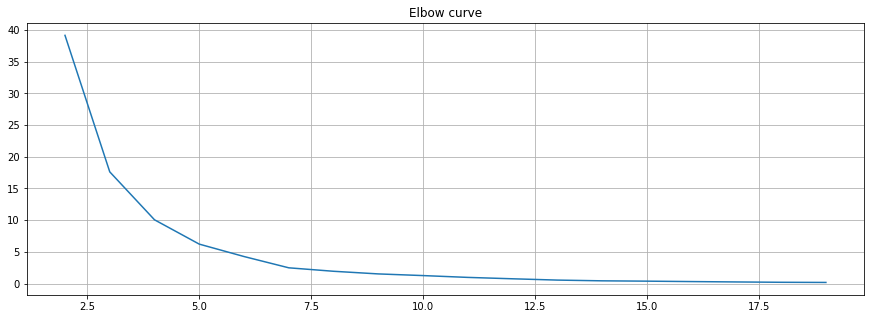

In [99]:
X_std_back = StandardScaler().fit_transform(job_skill.loc['Developer, back-end'].values[:,np.newaxis])
elbow(X_std_back)

In [142]:
clt = KMeans(4, random_state=0)
model = clt.fit(X_std_back)
clusters = pd.DataFrame(model.fit_predict(X_std_back), index = job_skill.columns, columns = ['skill'])

In [143]:
clusters['skill']

APL                   2
Assembly              2
Bash/Shell            3
C                     0
C#                    3
                     ..
Vim                   3
Visual Studio         3
Visual Studio Code    1
Webstorm              2
Xcode                 0
Name: skill, Length: 125, dtype: int32

In [144]:
clusters.value_counts()

skill
2        63
0        34
3        23
1         5
dtype: int64

In [146]:
colors = ['#DF2020', '#81DF20', '#2095DF', '#ddbbcc']
clusters['color'] = clusters['skill'].map({0 : colors[0], 1 : colors[1], 2 : colors[2], 3 : colors[3]})

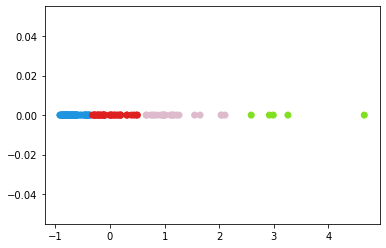

In [147]:
plt.scatter(x = X_std_back, y = np.zeros(len(X_std_back)) , color = clusters['color'])

In [149]:
clusters[clusters['skill'] == 2]

,skill,color
APL,2,#2095DF
Assembly,2,#2095DF
COBOL,2,#2095DF
Clojure,2,#2095DF
Crystal,2,#2095DF
...,...,...
RStudio,2,#2095DF
Rider,2,#2095DF
RubyMine,2,#2095DF
TextMate,2,#2095DF
